# CSC 603 - Homework 2

### Name:
### Id:

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

# Part 1: Logestic regression

#### <font color='purple'> 1)  Write a function to compute sigmoid using the following equation: </font>

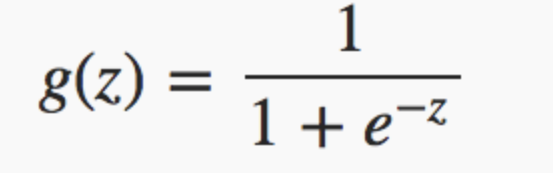

In [5]:
def sigmoid(z):
    ## write your code here
    return (1/(1 + np.exp(-z)))

In [6]:
z=np.array([0,2., -1, 22, 100])
print(sigmoid(z))

[0.5        0.88079708 0.26894142 1.         1.        ]


#### <font color='purple'> 2)  Write a function to compute the loss using the following formula </font>

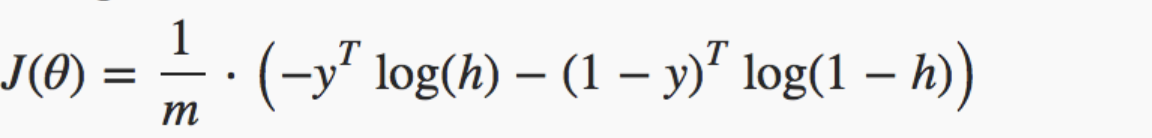

In [7]:
## y correct outputs
## y_bar: predicted outputs

def loss_fun(y, y_bar):
  # write your code here
  return np.sum((-y.T)*np.log(y_bar)-((1-y).T)*np.log(1-y_bar))/len(y) 


#### <font color='purple'> 3)  Write a function to compute the gradient using the following equation: </font>

In [8]:
y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
print(loss_fun(y, y_bar))

0.7585193823768298


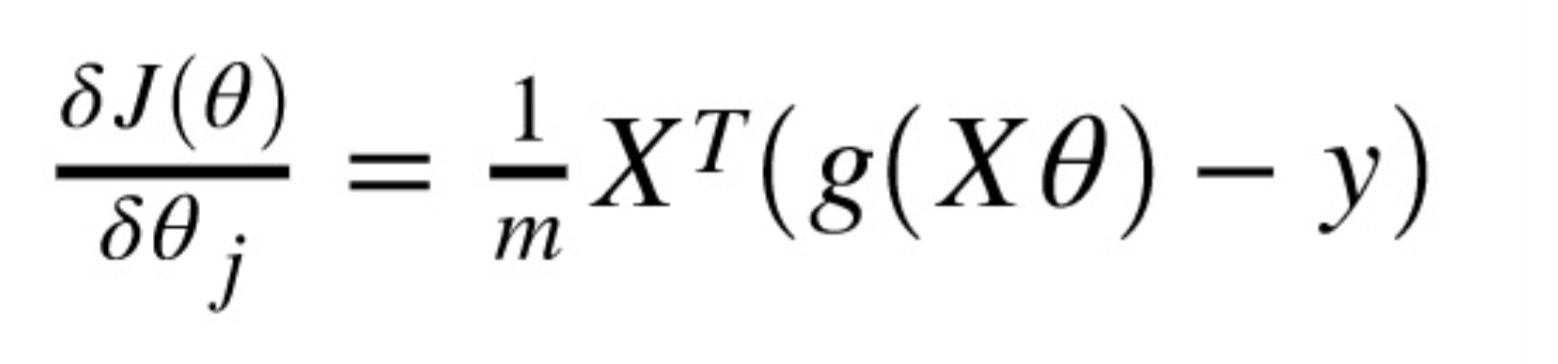

In [9]:
def compute_grad(X, y, y_bar):
    # write your code here
    grad=[]
    for i in range(X.shape[1]):
        grad.append(np.sum((X[:,i].T) *(y_bar-y))*(1/len(y)))  
    return np.float64(grad)

In [10]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])


In [11]:
print(X.shape)

(5, 4)


In [12]:
y_bar=np.array([0.5, 0.88079708 ,0.26894142, .1, .3])
y=np.array([1,1,0,1,0])
g=compute_grad(X, y, y_bar)

print(g)

[-0.1900523  -0.12430917 -0.60568548  0.16074014]


#### <font color='purple'> 4)  Write a function to compute $z$ using the following equation: </font>

$ z=X *\theta $

In [13]:
def f(X, theta):
    ## write your code here
    z=[]
    for i in range(X.shape[0]):
        z.append(np.sum((X[i,:].T) *theta))
    return np.float64(z)
   

In [15]:
theta=np.array([-1, .0, -2., .022])
z=f(X, theta)
print(z)

[-1.02756364 -1.99206849 -2.51734098 -8.39169429 -2.00650686]


#### <font color='purple'> 5)  Write a function to predict class labels for samples in X. </font>

In [16]:

def predict(X, theta):
    ### write your code here
            ## note if output>=0.5 then output 1 else: 0
    out = []
    result = []
    for i in range(X.shape[1]):
        r =X[i,0]*(theta[0])+X[i,1]*theta[1]+X[i,2]*theta[2]+X[i,3]*theta[3]
        if (r >= 0.5):
            out.append(1)
        else:
            out.append(0)
        result.append(r)
    print(result)
    
    return out

print(predict(X,theta))

[-1.02756363894, -1.9920684937, -2.5173409815200003, -8.3916942937]
[0, 0, 0, 0]


#### <font color='purple'> 5)  Write a function to compute the accuracy </font>

In [14]:
def score(y, y_bar):
    ## write your code there
    correct = 0
    for i in range(len(y)):
        if y[i] == y_bar[i]:
            correct += 1
    return correct / len(y) * 100.0


In [15]:
y_true=[1,1,1,0]
y_bar=[1,1,1,1]
print(score(y_true,y_bar))


75.0


## Let’s also define the train function which will be used to find the model parameters that minimizes the cost function using functions above.

In [16]:
def train(x,y, lr=0.02, iter=100):
    loss=[]
    theta=np.zeros(x.shape[1])
    theta+=0.001
    for i in range(iter):
        z=f(x,theta)
        a=sigmoid(z)
        loss_=loss_fun(y,a)
        g=compute_grad(x,y, a)
        theta=theta-lr*g
        loss.append(loss_)
    print(theta)
    # print(loss)
    
    rr=list(range(iter))
    plt.plot(rr, loss)
    plt.show()
    

[-0.18711262 -0.16410524  0.22767671 -0.22697003]


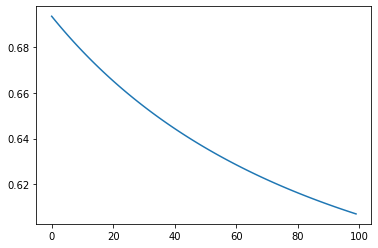

In [17]:
X=np.array([[1,0.77132064, 0.02075195, 0.63364823],
 [1, 1.74880388 ,0.49850701 ,0.22479665],
 [1, 0.19806286, 0.76053071 ,0.16911084],
 [1, 0.08833981 , 3.68535982 , -0.95339335],
 [1, -0.00394827 ,0.51219226 ,0.81262096]])


y=np.array([1,0,0,1,0])
train(X,y)

#### <font color='purple'> 6)  - Load cancer dataset from sklearn. Split the data into 70% for traing and 30% for testing. Train the training set using train function. Then, cacluate the accuracy on testing set
Linke well help you
https://necromuralist.github.io/data_science/posts/predicting-cancer/
</font>

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()

In [19]:
dataset = np.c_[data.data, data.target]
columns = np.append(data.feature_names, ["target"])
df = pd.DataFrame(dataset, columns=columns)
X = df[df.columns[:-1]]
Y = df.target

In [20]:
X=np.array(X)
Y=np.array(Y)
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = .30, random_state = 0)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn.predict(X_test)
socre = knn.score(X_test, y_test)

print('socre %f'%(socre))

socre 0.918129


# Part 2: Naive Bayes classifier

### You have a set of customers reviews (training set) and a classification as shown in the table below. 

In [16]:
reviews=[['he likes the restaurant'],['he dislikes the restaurant'],['wonderful restaurant'],
         ['great service and fantastic food']]
labels=['positive','negitive','positive','positive' ]

#### <font color='purple'> 1)  Write a function to return the number of all unique words in the training set</font>

In [17]:
def get_length_of_unique_words(corpus):
    ## write your code here
    unique =[]
    for lst in corpus:
        words = lst[0].split()
        for word in words:
            if word not  in unique:
                unique.append(word)

    return len(unique)

In [18]:

V = get_length_of_unique_words(reviews)
print(V)

11


#### <font color='purple'> 2)  Write a function to return the number of all words in given class</font>

In [26]:
def get_length_of_all_words_for_given_class(corpus,All_labels, given_class):
    ### write your code here
    j = 0
    cw = 0
    for lst in corpus:
        words = ''.join(lst)
        words =list(words.split(" "))
        if All_labels[j] == given_class:
            for w in words:
                cw +=1
        j = j+1
    return cw


In [27]:
## Test your code to validate the results
all_words_len_for_negitive_class=get_length_of_all_words_for_given_class(reviews,labels, given_class='negitive')
print(all_words_len_for_negitive_class)


all_words_len_for_positive_class=get_length_of_all_words_for_given_class(reviews,labels, given_class='positive')
print(all_words_len_for_positive_class)


4
11


#### <font color='purple'> 3)  Write a function to return the occurance of given word in spcific class</font>

In [28]:
def get_of_occurance_of_word_in_given_class(word,corpus,labels, given_class):
    ## write your code here
    j = 0
    cw = 0
    for lst in corpus:
        words = ''.join(lst)
        words =list(words.split(" "))
        if labels[j] == given_class:
            for w in words:
                if w == word:
                    cw +=1
        j +=1
    return cw

In [29]:
occurance=get_of_occurance_of_word_in_given_class(word='restaurant',corpus= reviews,labels= labels, given_class= 'negitive')

print(occurance)

1


#### <font color='purple'> 4)  Write a function to calculate the  prior probablity for given class</font>

In [30]:
def get_prior_prob(c):
    # write your code here
    count = 0
    for l in labels:
        if l ==c:
            count += 1
    return (count/len(labels))

In [31]:

print(get_prior_prob('negitive'))

0.25


#### <font color='purple'> 4)  Write a function to caclulate the likelihood for a word given a class p(word|class)</font>

In [32]:
## p(word|class)

def get_likelihood_for_given_word(corpus, all_labels, word, given_class):
    V=get_length_of_unique_words(reviews)
    Len_of_all_words_for_given_class=get_length_of_all_words_for_given_class(corpus,all_labels, given_class)
    occurance_ =get_of_occurance_of_word_in_given_class(word='restaurant', corpus= reviews, labels= labels, given_class= 'negitive')
    ## apply the formula
    likeihood=(occurance_+1)/(Len_of_all_words_for_given_class+V)
    return likeihood
  

In [33]:
likeihood=get_likelihood_for_given_word(reviews, labels,  word='restaurant', given_class= 'negitive')
print(likeihood)


0.13333333333333333


# Part 3: Classification using PCA, KNN, and logesitic regression

### LFW dataset
###### The LFW dataset contains 13,233 images of faces collected from the web. This dataset consists of the 5749 identities with 1680 people with two or more images.

In [34]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [35]:
## load lfw dataset
lfw= fetch_lfw_people(min_faces_per_person=10)


In [36]:
print(lfw.DESCR[:500])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two


In [42]:

poeple = lfw
dataset = np.c_[lfw.data, lfw.target]
df = pd.DataFrame(dataset)
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
print(Y.shape)
X.shape

## image size = 62* 47=2914

(1076,)


(1076, 2914)

### 1- Normalize the input features with mean zero and variance one

In [43]:
### write your code here
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA as RandomizedPCA

scaler  = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [44]:
# len(poeple.target_names)
print(X.mean(axis=0))
print(X.std(axis=0))

[-3.67322859e-17 -1.53119978e-16  8.56398802e-17 ...  1.60961702e-17
  6.12892636e-17 -4.84948719e-17]
[1. 1. 1. ... 1. 1. 1.]


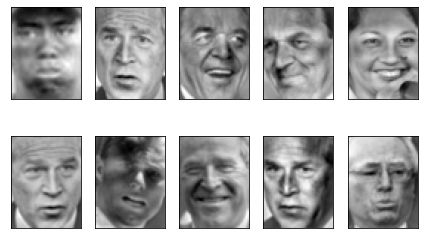

In [45]:
def plot_faces(images, n_row=2, n_col=5):
    w=47
    h=62
    """Helper function to plot a gallery of portraits"""
 
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()

#plot the average face and some samples from the dataset
plot_faces(X)


### 2- Split data to 70% for training and 30% for testing. Use train_test_split from sklearn with random_state=5

In [46]:
## write your code here
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = .30, random_state = 5)

### 3- Write Python code to implement a face recognition systems using scikit-learn on lfw dataset. These systems include:
1- Logestic regression model  (feed the images [raw features] into the logestic regression directly)<br> 
2- PCA + K_NN (number of principle components=100)<br>
3- PCA+ logestic regression( number of principle components=100)<br>
4- K-NN<br>
5- Create a table comparsions to compare the accuracy of the Face recogniton systems above (Note: use tabulate library to print tabular data. For more details: https://pypi.org/project/tabulate/


In [47]:
### write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

logisticRegr = LogisticRegression(C=10)
logisticRegr.fit(X_train, y_train)

# Make predictions on entire test data
predreg = logisticRegr.predict(X_test)
# Use score method to get accuracy of model
accuracyReg = accuracy_score(y_test,predreg)
print(accuracyReg)

0.7554179566563467


In [48]:
from sklearn.neighbors import KNeighborsClassifier
pca = RandomizedPCA(n_components=100, whiten=True).fit(X_train)
knn = KNeighborsClassifier(n_neighbors=5 ,weights='distance')

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Number of Feature after PCA: %d" % X_train_pca.shape[1])

knn.fit(X_train_pca,y_train)
predknn =knn.predict(X_test_pca)
accuracyknn = accuracy_score(y_test, predknn)
print('Accuracy ' + str(accuracyknn))


Number of Feature after PCA: 100
Accuracy 0.653250773993808


In [49]:
pca_log_reg=LogisticRegression(C=0.1)
# n_components = 100
print("Number of Feature after PCA: %d" % X_train_pca.shape[1])
# Training and Making Predictions
pca_log_reg.fit(X_train_pca, y_train)

# Make predictions on entire test data
pred_log_pca = pca_log_reg.predict(X_test_pca)
accuracy_log_pca = accuracy_score(y_test,pred_log_pca)
print('Accuracy ' + str(accuracy_log_pca))


Number of Feature after PCA: 100
Accuracy 0.7461300309597523


In [50]:
#  K-NN
knn2 = KNeighborsClassifier(n_neighbors=5 ,weights='distance')

knn2.fit(X_train,y_train)
predknn2 =knn2.predict(X_test)
accuracyknn2 = accuracy_score(y_test, predknn2)
print('Accuracy ' + str(accuracyknn2))

Accuracy 0.6346749226006192


In [51]:
from tabulate import tabulate
table = [["LogisticRegression",accuracyReg],["KNN(5)+PCA n=100 ",accuracyknn],
        ["LogisticRegression+ PCA n=100",accuracy_log_pca],['KNN(5)' ,accuracyknn2]]
headers = ["Model", "Accuracy"]
print(tabulate(table, headers, tablefmt="simple"))

Model                            Accuracy
-----------------------------  ----------
LogisticRegression               0.755418
KNN(5)+PCA n=100                 0.653251
LogisticRegression+ PCA n=100    0.74613
KNN(5)                           0.634675


### 4- Plot the decision boundary of K_NN and Logestic regression  (Note: you need to used pca to reduce the dimensions to 2 then apply K_NN and Logestic

In [52]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

pca = RandomizedPCA(n_components=2, whiten=True).fit(X_train)
X_train_p = pca.transform(X_train)
X_test_p = pca.transform(X_test)
print("Number of Feature after PCA: %d" % X_train_p.shape[1])

# Fitting Logistic Regression to the Training set
loReg = LogisticRegression(C=1)
loReg.fit(X_train_p, y_train)
# Make predictions on entire test data
predictions = loReg.predict(X_test_p)
# Use score method to get accuracy of model
score = accuracy_score(y_test, predictions)
print('Accuracy log ' +str(score))

knn3 = KNeighborsClassifier(n_neighbors=5 ,weights='uniform')
knn3.fit(X_train_p,y_train)
predknn =knn3.predict(X_test_p)
accuracyknn3 = accuracy_score(y_test, predknn)
print('Accuracy knn ' + str(accuracyknn3))

Number of Feature after PCA: 2
Accuracy log 0.5046439628482973
Accuracy knn 0.4148606811145511


In [54]:
h = .02  # step size in the mesh
x_min, x_max = X_train_p[:, 0].min() - 1, X_train_p[:, 0].max() + 1
y_min, y_max = X_train_p[:, 1].min() - 1, X_train_p[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
Z = loReg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.subplots(0,2, figsize=(10,6))
plt.figure(figsize=(6,4))

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train_p[:, 0], X_train_p[:, 1], c=y_train , cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("LogisticRegression (C= %i)"% (1))
# ................................................................
K = knn3.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
K = K.reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.pcolormesh(xx, yy, K, cmap=plt.cm.Paired)

plt.scatter(X_train_p[:, 0], X_train_p[:, 1], c=y_train , cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN ")

plt.show()